In [1]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:

#main_path = f'{os.getcwd()}'
Prosper_df = pd.read_csv("Data\prosperLoanData.csv")
Prosper_df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
Prosper_df.shape

(113937, 81)

<Axes: xlabel='IsBorrowerHomeowner', ylabel='count'>

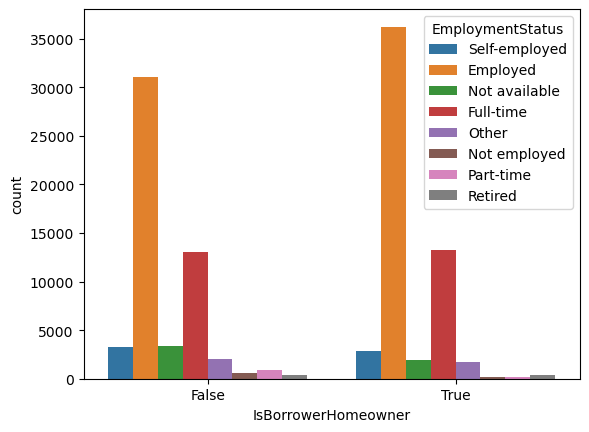

In [4]:
# EmploymentStatus & Homeownership
sns.countplot(x='IsBorrowerHomeowner',hue='EmploymentStatus',data=Prosper_df)
#IsBorrowerHomeowner, EmploymentStatus

<Axes: xlabel='IsBorrowerHomeowner', ylabel='count'>

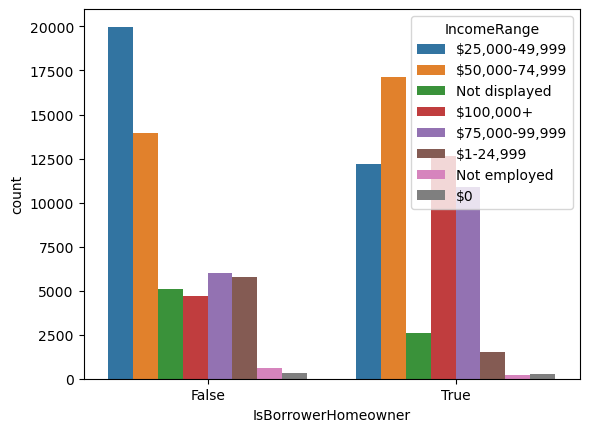

In [5]:
# EmploymentStatus & Homeownership
sns.countplot(x='IsBorrowerHomeowner',hue='IncomeRange',data=Prosper_df)
#IsBorrowerHomeowner, EmploymentStatus

<Axes: xlabel='ProsperRating (Alpha)', ylabel='count'>

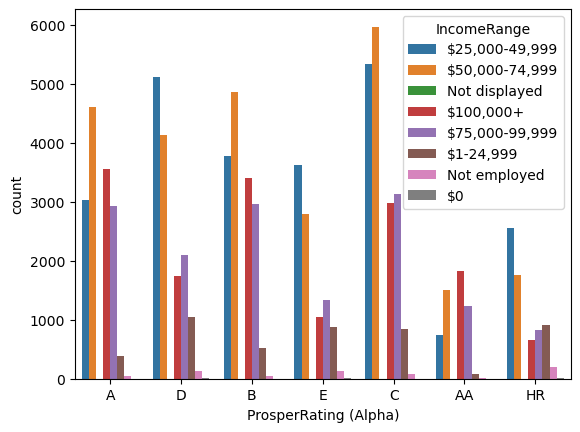

In [6]:
# IncomeRange & ProsperRating (Alpha)
sns.countplot(x='ProsperRating (Alpha)',hue='IncomeRange',data=Prosper_df)

In [7]:
Prosper_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
#Creating Credit Score ( Lowest + Highest credit score /2 )
Prosper_df['Average Credit Score'] = (Prosper_df['CreditScoreRangeLower'] + Prosper_df['CreditScoreRangeUpper']) / 2

In [9]:
#filling null values
Prosper_df.interpolate(method='linear', inplace=True)

In [10]:
#Making data frame with specific column 
specific_columns_df = ['Term','LoanStatus','ProsperRating (numeric)','Average Credit Score','BorrowerState','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','StatedMonthlyIncome','BorrowerRate','EmploymentStatusDuration','CurrentDelinquencies','LoanMonthsSinceOrigination','LoanOriginalAmount','TotalProsperPaymentsBilled', 'OnTimeProsperPayments','PublicRecordsLast12Months','PublicRecordsLast10Years']

In [11]:
specific_columnsss = Prosper_df[specific_columns_df]

In [12]:
Prosper_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Average Credit Score               0
Length: 82, dtype: int64

In [13]:
EmploymentStatus_unique_values = specific_columnsss['EmploymentStatus'].unique()
mapping = {
    'Self-employed': 1,
    'Employed': 1,
    'Not available': 0,
    'Full-time': 1,
    'Other': 4,
    'Not employed': 0,
    'Part-time': 2,
    'Retired': 3,
    'NaN': 0,
}

In [14]:
specific_columnsss['EmploymentStatus'] = specific_columnsss['EmploymentStatus'].replace(mapping)
specific_columnsss

,Term,LoanStatus,ProsperRating (numeric),Average Credit Score,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,BorrowerRate,EmploymentStatusDuration,CurrentDelinquencies,LoanMonthsSinceOrigination,LoanOriginalAmount,TotalProsperPaymentsBilled,OnTimeProsperPayments,PublicRecordsLast12Months,PublicRecordsLast10Years
0,36,Completed,NaN,649.5,CO,1.0,True,"$25,000-49,999",3083.333333,0.1580,2.0,2.0,78,9425,NaN,NaN,0.0,0.0
1,36,Current,6.0,689.5,CO,1.0,False,"$50,000-74,999",6125.000000,0.0920,44.0,0.0,0,10000,NaN,NaN,0.0,1.0
2,36,Completed,6.0,489.5,GA,0.0,False,Not displayed,2083.333333,0.2750,78.5,1.0,86,3001,NaN,NaN,0.0,0.0
3,36,Current,6.0,809.5,GA,1.0,True,"$25,000-49,999",2875.000000,0.0974,113.0,4.0,16,10000,NaN,NaN,0.0,0.0
4,36,Current,3.0,689.5,MN,1.0,True,"$100,000+",9583.333333,0.2085,44.0,0.0,6,15000,11.000000,11.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,4.0,709.5,IL,1.0,True,"$50,000-74,999",4333.333333,0.1864,246.0,0.0,11,10000,42.333333,42.333333,0.0,1.0
113933,36,FinalPaymentInProgress,6.0,709.5,PA,1.0,True,"$75,000-99,999",8041.666667,0.1110,21.0,1.0,28,2000,60.000000,60.000000,0.0,0.0
113934,60,Current,3.0,709.5,TX,1.0,True,"$25,000-49,999",2875.000000,0.2150,84.0,0.0,3,10000,38.000000,38.000000,0.0,0.0
113935,60,Completed,4.0,689.5,GA,1.0,True,"$25,000-49,999",3875.000000,0.2605,94.0,0.0,28,15000,16.000000,16.000000,0.0,1.0


In [15]:
specific_columnsss = specific_columnsss.dropna()

In [16]:
IncomeRange_Unique = specific_columnsss['IncomeRange'].unique()
mapping = {
    '$0': 0,
    '$1-24,999': 1,
    '$25,000-49,999': 1,
    '$50,000-74,999': 2,
    '$75,000-99,999': 2,
    '$100,000+': 3,
    'Not employed': 0,
    'Not displayed': 0
}

In [17]:
specific_columnsss['IncomeRange'] = specific_columnsss['IncomeRange'].replace(mapping)
specific_columnsss

,Term,LoanStatus,ProsperRating (numeric),Average Credit Score,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,BorrowerRate,EmploymentStatusDuration,CurrentDelinquencies,LoanMonthsSinceOrigination,LoanOriginalAmount,TotalProsperPaymentsBilled,OnTimeProsperPayments,PublicRecordsLast12Months,PublicRecordsLast10Years
4,36,Current,3.0,689.5,MN,1.0,True,3,9583.333333,0.2085,44.0,0.0,6,15000,11.000000,11.000000,0.0,0.0
5,60,Current,5.0,749.5,NM,1.0,True,3,8333.333333,0.1314,82.0,0.0,3,15000,15.666667,15.666667,0.0,0.0
6,36,Current,2.0,689.5,KS,1.0,False,1,2083.333333,0.2712,172.0,0.0,11,3000,20.333333,20.333333,0.0,0.0
7,36,Current,4.0,709.5,CA,1.0,False,1,3355.750000,0.2019,103.0,0.0,10,10000,25.000000,25.000000,0.0,1.0
8,36,Current,7.0,829.5,IL,1.0,True,1,3333.333333,0.0629,269.0,0.0,3,10000,29.666667,29.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,4.0,709.5,IL,1.0,True,2,4333.333333,0.1864,246.0,0.0,11,10000,42.333333,42.333333,0.0,1.0
113933,36,FinalPaymentInProgress,6.0,709.5,PA,1.0,True,2,8041.666667,0.1110,21.0,1.0,28,2000,60.000000,60.000000,0.0,0.0
113934,60,Current,3.0,709.5,TX,1.0,True,1,2875.000000,0.2150,84.0,0.0,3,10000,38.000000,38.000000,0.0,0.0
113935,60,Completed,4.0,689.5,GA,1.0,True,1,3875.000000,0.2605,94.0,0.0,28,15000,16.000000,16.000000,0.0,1.0


In [18]:
IncomeRange_Unique = specific_columnsss['LoanStatus'].unique()
mapping = {
    'Completed': "1",
    'Current': "1",
    'FinalPaymentInProgress': "1",
    'Past Due (1-15 days)': "2",
    'Past Due (16-30 days)': "2",
    'Past Due (31-60 days)': "2",
    'Past Due (61-90 days)': "3",
    'Past Due (91-120 days)': "3",
    'Past Due (>120 days)': "3",
    'Chargedoff': "3",
    'Defaulted': "3",
    'Cancelled': "3",
    
       
}
specific_columnsss['LoanStatus'] = specific_columnsss['LoanStatus'].replace(mapping)
specific_columnsss

,Term,LoanStatus,ProsperRating (numeric),Average Credit Score,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,BorrowerRate,EmploymentStatusDuration,CurrentDelinquencies,LoanMonthsSinceOrigination,LoanOriginalAmount,TotalProsperPaymentsBilled,OnTimeProsperPayments,PublicRecordsLast12Months,PublicRecordsLast10Years
4,36,1,3.0,689.5,MN,1.0,True,3,9583.333333,0.2085,44.0,0.0,6,15000,11.000000,11.000000,0.0,0.0
5,60,1,5.0,749.5,NM,1.0,True,3,8333.333333,0.1314,82.0,0.0,3,15000,15.666667,15.666667,0.0,0.0
6,36,1,2.0,689.5,KS,1.0,False,1,2083.333333,0.2712,172.0,0.0,11,3000,20.333333,20.333333,0.0,0.0
7,36,1,4.0,709.5,CA,1.0,False,1,3355.750000,0.2019,103.0,0.0,10,10000,25.000000,25.000000,0.0,1.0
8,36,1,7.0,829.5,IL,1.0,True,1,3333.333333,0.0629,269.0,0.0,3,10000,29.666667,29.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,1,4.0,709.5,IL,1.0,True,2,4333.333333,0.1864,246.0,0.0,11,10000,42.333333,42.333333,0.0,1.0
113933,36,1,6.0,709.5,PA,1.0,True,2,8041.666667,0.1110,21.0,1.0,28,2000,60.000000,60.000000,0.0,0.0
113934,60,1,3.0,709.5,TX,1.0,True,1,2875.000000,0.2150,84.0,0.0,3,10000,38.000000,38.000000,0.0,0.0
113935,60,1,4.0,689.5,GA,1.0,True,1,3875.000000,0.2605,94.0,0.0,28,15000,16.000000,16.000000,0.0,1.0


In [19]:
specific_columnsss['LoanStatus'].unique()

array(['1', '2', '3'], dtype=object)

In [20]:
specific_columnsss=specific_columnsss.dropna()

In [21]:
X = specific_columnsss[['Average Credit Score','EmploymentStatus','EmploymentStatusDuration','CurrentDelinquencies','IncomeRange']]
Y = specific_columnsss[['LoanStatus']]

In [22]:
 # Define target vector
y = specific_columnsss["LoanStatus"].values[:20]
y

array(['1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '3', '1', '1',
       '1', '1', '1', '1', '3', '1', '1'], dtype=object)

In [23]:
X

,Average Credit Score,EmploymentStatus,EmploymentStatusDuration,CurrentDelinquencies,IncomeRange
4,689.5,1.0,44.0,0.0,3
5,749.5,1.0,82.0,0.0,3
6,689.5,1.0,172.0,0.0,1
7,709.5,1.0,103.0,0.0,1
8,829.5,1.0,269.0,0.0,1
...,...,...,...,...,...
113932,709.5,1.0,246.0,0.0,2
113933,709.5,1.0,21.0,1.0,2
113934,709.5,1.0,84.0,0.0,1
113935,689.5,1.0,94.0,0.0,1


In [24]:
Y

,LoanStatus
4,1
5,1
6,1
7,1
8,1
...,...
113932,1
113933,1
113934,1
113935,1


In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [26]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [27]:
print(X_train.shape,X_test.shape)

(86040, 5) (21510, 5)


In [28]:
X_scaler = scaler.fit(X_train)

In [29]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
#from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
Rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=50)

In [31]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 10)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=10)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

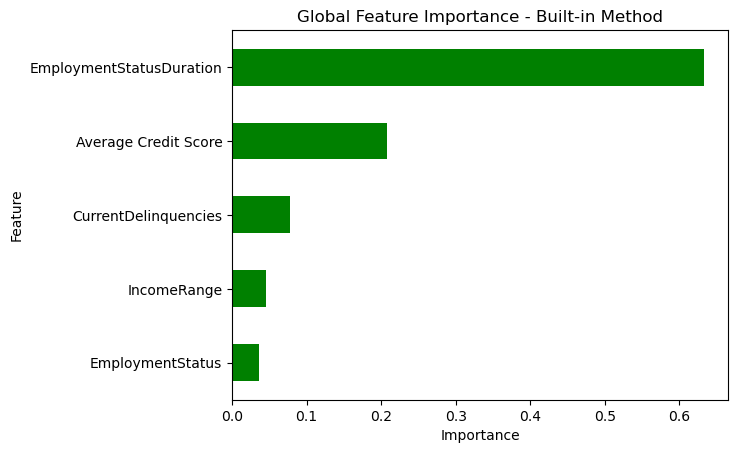

In [33]:
global_importances = pd.Series(Rf_model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [34]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(X_test)
accuracy_score(Y_test,pred_cv)

0.8529083606069622

In [35]:
pred_train = model.predict(X_train)
print("Accuracy: ",accuracy_score(Y_train,pred_train))

Accuracy:  0.8506979742629739


In [36]:
#Logical Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(X_train) 
print("Accuracy: ",accuracy_score(y_pred,Y_train))

Accuracy:  0.847772185167737


In [38]:
#Linear SVM

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
model.fit(X_train, Y_train)

SGDClassifier(alpha=0.001, max_iter=15, random_state=5, tol=None)

In [39]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print("Accuracy: ",accuracy_score(y_pred,Y_train))

Accuracy:  0.8444248840842032
